<a href="https://colab.research.google.com/github/Devansh-Gupta-09/IIT_Mandi_Research_Intern/blob/main/WeatherPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from google.colab import files
uploaded = files.upload()

Saving Weather Data.csv to Weather Data.csv


In [10]:
df=pd.read_csv('Weather Data.csv')
df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [15]:
df.shape
df.columns


Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [19]:
df.Weather.value_counts()

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

In [20]:
df.Weather.unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [21]:
df.Weather.nunique()

50

In [18]:
df.dtypes


Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [22]:
x='Thunderstorms,Moderate Rain Showers,Fog'

In [23]:
list_of_lists=[w.split() for w in x.split(',')]
list_of_lists


[['Thunderstorms'], ['Moderate', 'Rain', 'Showers'], ['Fog']]

In [24]:
from itertools import chain
flat_list=list(chain(*list_of_lists))
flat_list

['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']

In [25]:
def Create_list(x):
  list_of_lists = [w.split() for w in x.split(',')]
  flat_list = list(chain(*list_of_lists))
  return flat_list

def Get_Weather(list1):
  if'Fog' in list1 and 'Rain' in list1:
    return 'RAIN+FOG'
  elif 'Snow' in  list1 and 'Rain' in list1:
    return 'SNOW+RAIN'
  elif 'Snow' in list1:
    return 'SNOW'
  elif 'Rain' in list1:
    return 'RAIN'
  elif 'Fog' in list1:
    return 'Fog'
  elif 'Clear' in list1:
    return 'CLEAR'
  elif 'Cloudy' in list1:
    return 'CLOUDY'
  else:
    return 'RAIN'

In [26]:
Create_list(x)


['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']

In [27]:
Get_Weather(Create_list(x))

'RAIN+FOG'

In [30]:
df['Std_Weather'] = df['Weather'].apply(lambda x : Get_Weather(Create_list(x)))
df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",Fog
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",Fog
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog,Fog
...,...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow,SNOW
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow,SNOW
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow,SNOW
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow,SNOW


In [31]:
df.Std_Weather.value_counts()

Std_Weather
CLOUDY       3797
CLEAR        3432
RAIN          603
SNOW          556
Fog           241
RAIN+FOG      129
SNOW+RAIN      26
Name: count, dtype: int64

Sample Selection

In [35]:
cloudy_df = df[df['Std_Weather'] == 'CLOUDY'].sample(600)
cloudy_df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
182,1/8/2012 14:00,-6.5,-12.0,65,19,24.1,101.97,Mostly Cloudy,CLOUDY
2559,4/16/2012 15:00,27.4,11.5,37,28,24.1,100.12,Mostly Cloudy,CLOUDY
3561,5/28/2012 9:00,17.0,7.4,53,20,48.3,101.24,Cloudy,CLOUDY
8184,12/7/2012 0:00,-1.3,-5.9,71,13,25.0,101.67,Mostly Cloudy,CLOUDY
7017,10/19/2012 9:00,12.8,10.6,86,24,24.1,100.77,Cloudy,CLOUDY
...,...,...,...,...,...,...,...,...,...
4444,7/4/2012 4:00,19.9,16.9,83,13,19.3,100.21,Cloudy,CLOUDY
4233,6/25/2012 9:00,18.8,13.0,69,26,24.1,100.13,Mostly Cloudy,CLOUDY
7201,10/27/2012 1:00,12.1,10.8,92,4,16.1,101.42,Cloudy,CLOUDY
682,1/29/2012 10:00,-1.8,-8.3,61,24,24.1,100.87,Mostly Cloudy,CLOUDY


In [36]:
clear_df = df[df['Std_Weather'] == 'CLEAR'].sample(600)
clear_df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
7928,11/26/2012 8:00,-5.5,-10.6,67,19,24.1,101.03,Mainly Clear,CLEAR
4127,6/20/2012 23:00,27.3,20.1,65,19,25.0,100.60,Mainly Clear,CLEAR
1935,3/21/2012 15:00,25.4,12.0,43,17,48.3,101.72,Clear,CLEAR
4459,7/4/2012 19:00,23.3,20.2,83,6,24.1,100.09,Mainly Clear,CLEAR
4058,6/18/2012 2:00,19.7,13.5,67,19,25.0,101.08,Mainly Clear,CLEAR
...,...,...,...,...,...,...,...,...,...
1965,3/22/2012 21:00,12.1,7.4,73,7,25.0,101.59,Mainly Clear,CLEAR
3209,5/13/2012 17:00,20.4,4.1,34,15,48.3,101.48,Mainly Clear,CLEAR
4381,7/1/2012 13:00,25.4,14.0,49,22,48.3,100.55,Mainly Clear,CLEAR
8607,12/24/2012 15:00,-7.5,-13.3,63,13,48.3,101.49,Mainly Clear,CLEAR


In [38]:
rain_df = df[df['Std_Weather'] == 'RAIN'].sample(600)
rain_df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
1802,3/16/2012 2:00,1.1,0.2,94,17,12.9,101.56,Rain,RAIN
3076,5/8/2012 4:00,14.2,10.4,78,17,25.0,100.60,Rain,RAIN
4265,6/26/2012 17:00,16.1,12.5,79,13,24.1,99.99,Rain Showers,RAIN
6898,10/14/2012 10:00,7.3,5.7,90,6,16.1,101.14,Drizzle,RAIN
5109,7/31/2012 21:00,22.8,18.8,78,13,25.0,100.65,"Thunderstorms,Rain Showers",RAIN
...,...,...,...,...,...,...,...,...,...
1320,2/25/2012 0:00,1.0,-0.6,89,11,12.9,98.29,Rain,RAIN
4288,6/27/2012 16:00,20.3,14.2,68,20,24.1,100.03,Rain,RAIN
6841,10/12/2012 1:00,8.1,5.4,83,24,25.0,100.75,Rain,RAIN
3078,5/8/2012 6:00,12.6,10.4,86,22,9.7,100.51,Rain,RAIN


In [42]:
snow_df = df[df['Std_Weather'] == 'SNOW'].sample(556)
snow_df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
740,1/31/2012 20:00,-7.4,-10.7,77,20,1.6,101.09,Snow,SNOW
1091,2/15/2012 11:00,2.0,-0.2,85,0,8.0,101.65,Snow,SNOW
401,1/17/2012 17:00,-3.6,-5.9,84,22,1.6,99.57,Snow,SNOW
1332,2/25/2012 12:00,-2.5,-4.2,88,33,3.2,98.75,Snow,SNOW
86,1/4/2012 14:00,-11.3,-19.0,53,7,19.3,100.97,Snow,SNOW
...,...,...,...,...,...,...,...,...,...
8001,11/29/2012 9:00,-4.6,-7.0,83,19,9.7,101.67,Snow,SNOW
398,1/17/2012 14:00,-4.3,-6.5,85,22,1.6,100.05,Snow,SNOW
1334,2/25/2012 14:00,-3.2,-6.3,79,35,3.2,99.05,Snow,SNOW
816,2/4/2012 0:00,-4.5,-6.8,84,9,2.0,102.02,Snow,SNOW


In [43]:
snow_df.shape

(556, 9)

In [44]:
rain_df.shape

(600, 9)

In [46]:
clear_df.shape

(600, 9)

In [47]:
cloudy_df.shape

(600, 9)

COMBINING ALL THESE DATASETS

In [57]:
#making a new dataset entirely
weather_df =pd.concat([cloudy_df,clear_df,rain_df,snow_df],axis=0)
weather_df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
182,1/8/2012 14:00,-6.5,-12.0,65,19,24.1,101.97,Mostly Cloudy,CLOUDY
2559,4/16/2012 15:00,27.4,11.5,37,28,24.1,100.12,Mostly Cloudy,CLOUDY
3561,5/28/2012 9:00,17.0,7.4,53,20,48.3,101.24,Cloudy,CLOUDY
8184,12/7/2012 0:00,-1.3,-5.9,71,13,25.0,101.67,Mostly Cloudy,CLOUDY
7017,10/19/2012 9:00,12.8,10.6,86,24,24.1,100.77,Cloudy,CLOUDY
...,...,...,...,...,...,...,...,...,...
8001,11/29/2012 9:00,-4.6,-7.0,83,19,9.7,101.67,Snow,SNOW
398,1/17/2012 14:00,-4.3,-6.5,85,22,1.6,100.05,Snow,SNOW
1334,2/25/2012 14:00,-3.2,-6.3,79,35,3.2,99.05,Snow,SNOW
816,2/4/2012 0:00,-4.5,-6.8,84,9,2.0,102.02,Snow,SNOW


In [50]:
weather_df.shape
#600 + 600 + 600 + 556

(2356, 9)

In [58]:
weather_df.drop(columns=['Date/Time','Weather'], axis=1,inplace=True)
weather_df

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
182,-6.5,-12.0,65,19,24.1,101.97,CLOUDY
2559,27.4,11.5,37,28,24.1,100.12,CLOUDY
3561,17.0,7.4,53,20,48.3,101.24,CLOUDY
8184,-1.3,-5.9,71,13,25.0,101.67,CLOUDY
7017,12.8,10.6,86,24,24.1,100.77,CLOUDY
...,...,...,...,...,...,...,...
8001,-4.6,-7.0,83,19,9.7,101.67,SNOW
398,-4.3,-6.5,85,22,1.6,100.05,SNOW
1334,-3.2,-6.3,79,35,3.2,99.05,SNOW
816,-4.5,-6.8,84,9,2.0,102.02,SNOW


Checking if duplicate values null or missing values


In [59]:
weather_df.isnull().sum()

Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Std_Weather         0
dtype: int64

In [60]:
weather_df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,2356.000000,2356.000000,2356.000000,2356.000000,2356.000000,2356.000000
mean,6.661885,1.520204,72.101868,16.723260,23.161545,100.803519
std,11.145325,10.331655,16.335256,9.584612,12.735542,0.930459
min,-18.600000,-25.500000,18.000000,0.000000,0.600000,97.520000
25%,-2.625000,-6.800000,62.000000,9.000000,16.100000,100.267500
50%,5.500000,0.300000,76.000000,15.000000,24.100000,100.830000
75%,16.400000,10.400000,85.000000,22.000000,25.000000,101.420000
max,32.900000,23.100000,99.000000,57.000000,48.300000,103.610000


In [61]:
#CORELATION
weather_df.columns

Index(['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h',
       'Visibility_km', 'Press_kPa', 'Std_Weather'],
      dtype='object')

In [62]:
cols=['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h',
       'Visibility_km', 'Press_kPa']


In [64]:
correlation = weather_df[cols].corr()
correlation

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.935268,-0.247243,-0.126873,0.403062,-0.091679
Dew Point Temp_C,0.935268,1.000000,0.105001,-0.119724,0.183717,-0.203240
Rel Hum_%,-0.247243,0.105001,1.000000,0.032726,-0.652717,-0.319635
Wind Speed_km/h,-0.126873,-0.119724,0.032726,1.000000,-0.143365,-0.409516
Visibility_km,0.403062,0.183717,-0.652717,-0.143365,1.000000,0.322878
Press_kPa,-0.091679,-0.203240,-0.319635,-0.409516,0.322878,1.000000


HEAT MAP

<Axes: >

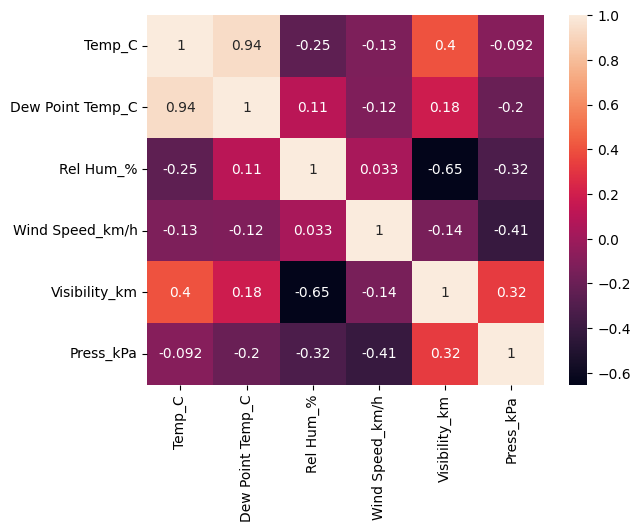

In [66]:
sns.heatmap(correlation,annot=True)

<Axes: ylabel='Frequency'>

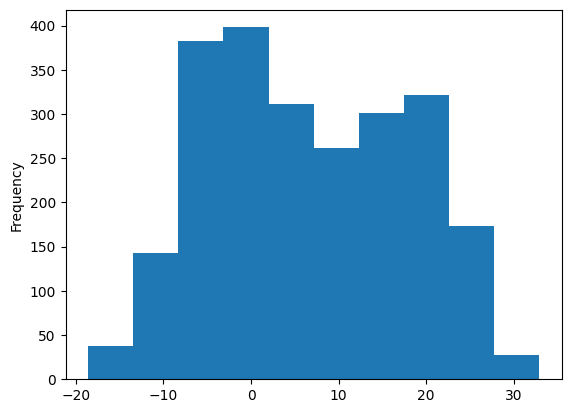

In [67]:
weather_df['Temp_C'].plot(kind='hist')

<Axes: ylabel='Frequency'>

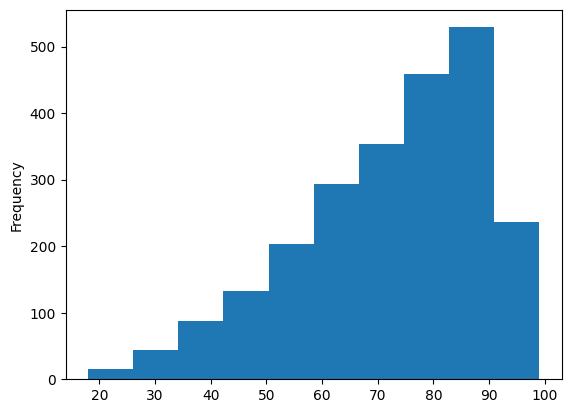

In [68]:
weather_df['Rel Hum_%'].plot(kind='hist')

<Axes: ylabel='Frequency'>

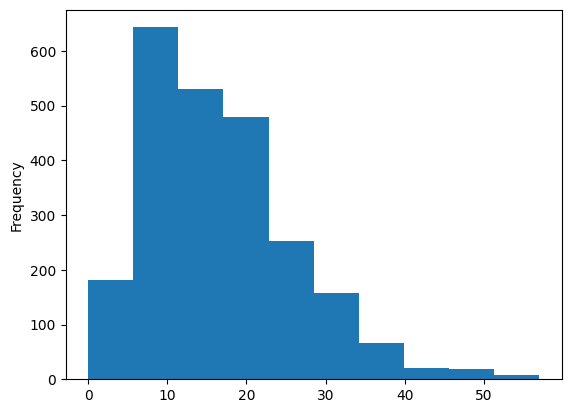

In [69]:
weather_df['Wind Speed_km/h'].plot(kind='hist')

<Axes: ylabel='Frequency'>

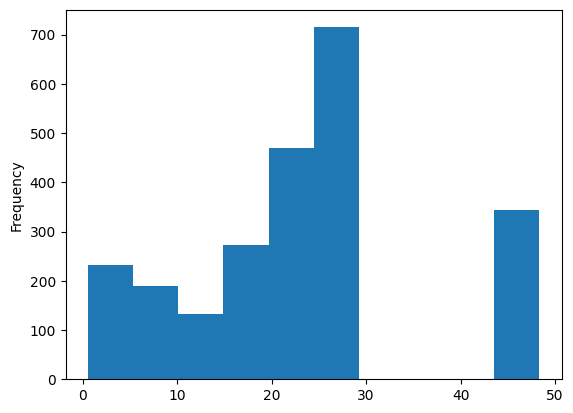

In [70]:
weather_df['Visibility_km'].plot(kind='hist')

<Axes: >

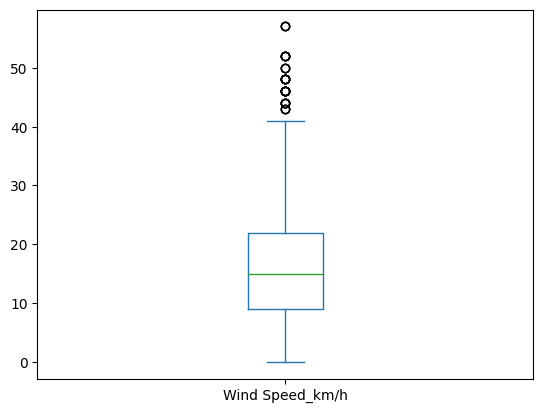

In [71]:
weather_df['Wind Speed_km/h'].plot(kind='box')

In [72]:
from sklearn.preprocessing import LabelEncoder


In [73]:
label_Encoder = LabelEncoder()

In [74]:
weather_df['Std_Weather']=label_Encoder.fit_transform(weather_df['Std_Weather'])

In [75]:
label_Encoder.classes_

array(['CLEAR', 'CLOUDY', 'RAIN', 'SNOW'], dtype=object)

In [76]:
weather_df

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
182,-6.5,-12.0,65,19,24.1,101.97,1
2559,27.4,11.5,37,28,24.1,100.12,1
3561,17.0,7.4,53,20,48.3,101.24,1
8184,-1.3,-5.9,71,13,25.0,101.67,1
7017,12.8,10.6,86,24,24.1,100.77,1
...,...,...,...,...,...,...,...
8001,-4.6,-7.0,83,19,9.7,101.67,3
398,-4.3,-6.5,85,22,1.6,100.05,3
1334,-3.2,-6.3,79,35,3.2,99.05,3
816,-4.5,-6.8,84,9,2.0,102.02,3


In [77]:
weather_df.Std_Weather.value_counts()

Std_Weather
1    600
0    600
2    600
3    556
Name: count, dtype: int64

X variables are the Temp , humidity , windspeed

Y variable or the target variable is the Std weather

In [78]:
X = weather_df.drop(['Std_Weather'],axis=1)
X

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
182,-6.5,-12.0,65,19,24.1,101.97
2559,27.4,11.5,37,28,24.1,100.12
3561,17.0,7.4,53,20,48.3,101.24
8184,-1.3,-5.9,71,13,25.0,101.67
7017,12.8,10.6,86,24,24.1,100.77
...,...,...,...,...,...,...
8001,-4.6,-7.0,83,19,9.7,101.67
398,-4.3,-6.5,85,22,1.6,100.05
1334,-3.2,-6.3,79,35,3.2,99.05
816,-4.5,-6.8,84,9,2.0,102.02


In [79]:
Y=weather_df['Std_Weather']
Y

182     1
2559    1
3561    1
8184    1
7017    1
       ..
8001    3
398     3
1334    3
816     3
103     3
Name: Std_Weather, Length: 2356, dtype: int64

FEATURE SCALING

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
std_scaler = StandardScaler()

In [83]:
X_std=std_scaler.fit_transform(X)
X_std

array([[-1.1811839 , -1.30889714, -0.43484935,  0.23759163,  0.07370352,
         1.25392895],
       [ 1.8610958 ,  0.96614867, -2.14929722,  1.17679614,  0.07370352,
        -0.73476003],
       [ 0.92777105,  0.56922578, -1.16961272,  0.34194769,  1.97430094,
         0.46920303],
       ...,
       [-0.88503278, -0.75707752,  0.42237459,  1.90728854, -1.56772152,
        -1.88497475],
       [-1.00169837, -0.80548275,  0.72852599, -0.80596893, -1.66196602,
         1.3076773 ],
       [-1.23502956, -1.08623308,  0.60606543, -0.80596893, -1.05723048,
        -0.5305163 ]])

SPLITTING DATA INTO TESTING AND TRAINING
20 80 split between testing and training

In [84]:
from sklearn.model_selection import train_test_split

In [86]:
x_train , x_test , y_train , y_test = train_test_split(X_std,Y,test_size=0.2,random_state=42)

In [88]:
x_train.shape

(1884, 6)

In [91]:
x_test.shape

(472, 6)

(472, 6)

MODEL BUILD


In [93]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model=DecisionTreeClassifier()


MODEL TRAINING

In [95]:
decision_tree_model.fit(x_train,y_train)

DecisionTreeClassifier()

MODEL PREDICTION

In [96]:
y_predict=decision_tree_model.predict(x_test)

MODEL EVAL

In [97]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

ACCURACY


In [110]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predict)
accuracy

0.5932203389830508

CLASSIFICATION REPORT


In [111]:
print(classification_report(y_test,y_predict))


              precision    recall  f1-score   support

           0       0.52      0.49      0.50       119
           1       0.43      0.50      0.46       132
           2       0.67      0.66      0.67       115
           3       0.83      0.75      0.79       106

    accuracy                           0.59       472
   macro avg       0.62      0.60      0.61       472
weighted avg       0.60      0.59      0.60       472



CONFUSION MATRIx


<Axes: >

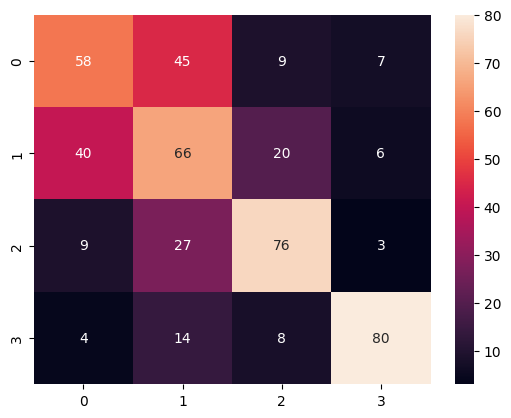

In [114]:
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True,fmt='d')

In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [118]:
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
svc_model = SVC()
knn_model= KNeighborsClassifier()
lr_model=LogisticRegression()
nb_model = GaussianNB()

In [119]:
model_list =[dt_model,rf_model,svc_model,knn_model,lr_model,nb_model]

In [120]:
acc_list=[]
for model in model_list:
  model.fit(x_train,y_train)
  y_predict=model.predict(x_test)
  acc=accuracy_score(y_test,y_predict)
  acc_list.append(acc)


In [121]:
acc_list

[0.6165254237288136,
 0.6822033898305084,
 0.6207627118644068,
 0.625,
 0.5995762711864406,
 0.5677966101694916]

Hyperparameter tuning under model tuning


In [122]:
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

In [124]:
parameters = {
    'n_estimators' : [50,100],
    'max_features' : ['sqrt','log2',None]
}

In [125]:
grid_search=GridSearchCV(estimator=rf_model,param_grid=parameters)

In [127]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100]})

BEST HYPER PARAM

In [128]:
grid_search.best_params_

{'max_features': 'sqrt', 'n_estimators': 100}

In [130]:
Random_forest_model_new=RandomForestClassifier(max_features='log2',n_estimators=50)

In [131]:
Random_forest_model_new.fit(x_train,y_train)

RandomForestClassifier(max_features='log2', n_estimators=50)

In [133]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Random_forest_model_new,X_std,Y,cv=5,scoring='accuracy')
print('Cross-Validaiton SCores =',scores)

Cross-Validaiton SCores = [0.69279661 0.66454352 0.69002123 0.69002123 0.67303609]


In [134]:
scores.mean()

0.6820837381697794